In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh_TGV1')
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import Optics
from HHG import ActiveGrating
import Graph

Grating = Optics.Grating()

In [4]:
import importlib
importlib.reload(Optics)

w0 = 1e-3
wt = 5e-15

IR = Optics.Pulse(w0=w0, lam=800e-9, wt=wt)

d = -IR.zR*1

grid = IR.Grid(Lx=w0*30, Ly=wt*30, Nx=2001, Ny=2001)
STOV = IR.LG_STOV(grid[0], 0, grid[1], l=-3, p=0)

mono1, grid_mono1 = IR.Mono_1D_Fresnel(np.copy(STOV), grid, d)
poly1, grid_poly1 = IR.Poly_1D_Fresnel(np.copy(STOV), grid, d)

c:\Users\tg263331\Desktop\Dossiers\Python\HHG Simulation\HHG-Simulations\Optics.py:216: RuntimeWarning: divide by zero encountered in divide
  lam_axis = 2*np.pi*3e8/w
c:\Users\tg263331\Desktop\Dossiers\Python\HHG Simulation\HHG-Simulations\Optics.py:236: RuntimeWarning: invalid value encountered in multiply
  field[i] = np.flip(np.nan_to_num( np.interp(np.flip(xp), np.flip(xp*lam_axis[i]/self.lam), np.flip(field[i])) \


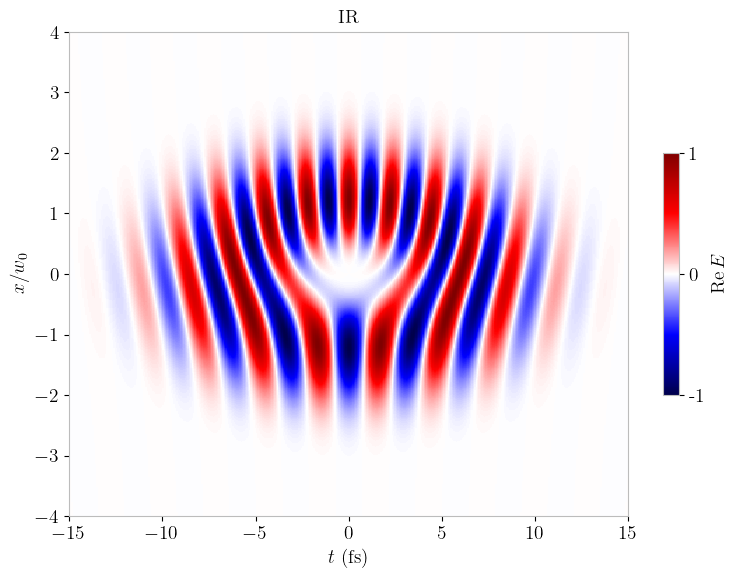

In [5]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, tight_layout=True)

x, t = grid[0][0], grid[1].T[0] # retrieve axes from meshgrid
x = x/IR.w0
t = t/1e-15
extent=[t[0], t[-1], x[0], x[-1]]

im = ax.imshow(np.real(STOV).T/np.max(np.real(STOV)), cmap='seismic', aspect='auto', extent=extent, vmin=-1, vmax=1)

cbar = plt.colorbar(im, orientation='vertical', ticks=[-1, 0, 1], shrink=0.5, aspect=15)
cbar.ax.set_yticklabels(['-1', '0', '1'])
cbar.ax.set_ylabel('$\Re E$')

Xm = 3*wt/1e-15
ax.set_xlim(-Xm, Xm)
ax.set_ylim(-4, 4)

ax.set_xlabel('$t \ \mathrm{(fs)}$')
ax.set_ylabel('$x/w_0$')

#ax.set_xticks([-40, -20, 0, 20, 40], [-40, -20, 0, 20, 40])
#ax.set_yticks([-2, -1, 0, 1, 2], [-2, -1, 0, 1, 2])

ax.set_title('IR')

plt.show()

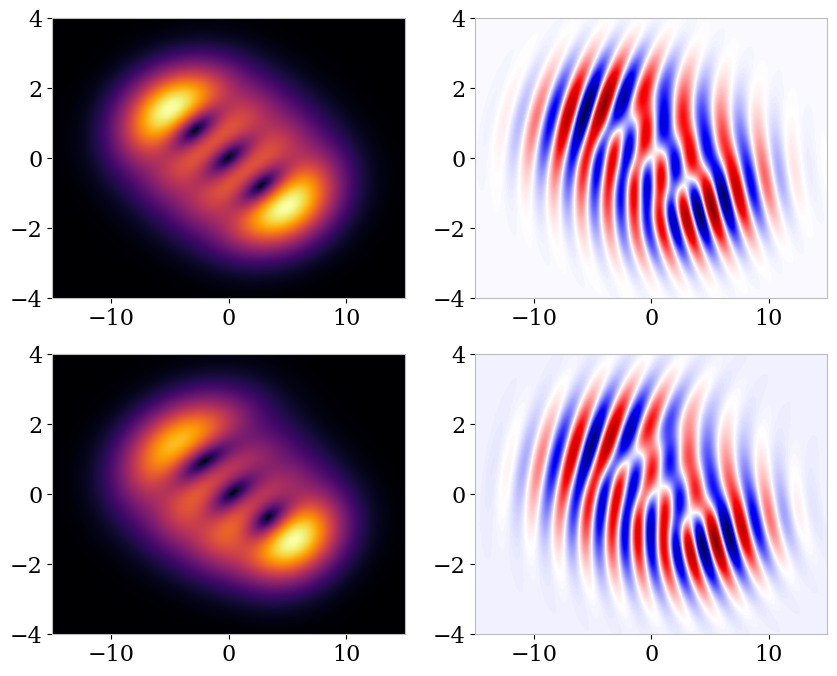

In [48]:
fig, ax = plt.subplots(2, 2, figsize=(10, 8))
cmap='inferno'

x, t = grid_mono1[0][0], grid_mono1[1].T[0] # retrieve axes from meshgrid
t = t
x = x/IR.w0
t = t/1e-15
extent_mono=[t[0], t[-1], x[0], x[-1]]

x, t = grid_poly1[0][0], grid_poly1[1].T[0] # retrieve axes from meshgrid
t = t
x = x/IR.w0
t = t/1e-15
extent_poly=[t[0], t[-1], x[0], x[-1]]

ax[0, 0].imshow(np.abs(mono1).T, cmap=cmap, aspect='auto', extent=extent_mono, interpolation='bilinear')
ax[1, 0].imshow(np.abs(poly1).T, cmap=cmap, aspect='auto', extent=extent_poly, interpolation='bilinear')

ax[0, 1].imshow(np.real(mono1).T, cmap='seismic', aspect='auto', extent=extent_mono, interpolation='bilinear')
ax[1, 1].imshow(np.real(poly1).T, cmap='seismic', aspect='auto', extent=extent_poly, interpolation='bilinear')


Ym = 4*np.abs(d)/IR.zR
ax[0, 0].set_xlim(-Xm, Xm)
ax[0, 0].set_ylim(-Ym, Ym)
ax[1, 0].set_xlim(-Xm, Xm)
ax[1, 0].set_ylim(-Ym, Ym)
ax[0, 1].set_xlim(-Xm, Xm)
ax[0, 1].set_ylim(-Ym, Ym)
ax[1, 1].set_xlim(-Xm, Xm)
ax[1, 1].set_ylim(-Ym, Ym)

plt.show()

In [53]:
import importlib
importlib.reload(Optics)

w0 = 1e-3
wt = 50e-15

IR = Optics.Pulse(w0=w0, lam=800e-9, wt=wt)

d = -IR.zR*1

grid = IR.Grid(Lx=w0*30, Ly=wt*30, Nx=2001, Ny=2001)
STOV = IR.LG_STOV(grid[0], 0, grid[1], l=-3, p=0)

In [54]:
mono_list = []
monogrid_list = []
poly_list = []
polygrid_list = []
d_list = [-2*IR.zR, -IR.zR, 0, IR.zR, 2*IR.zR]

for d in d_list:
    if d==0:
        mono_list.append(np.copy(STOV))
        poly_list.append(np.copy(STOV))
        monogrid_list.append(np.copy(grid))
        polygrid_list.append(np.copy(grid))
    else:
        mono, grid_mono = IR.Mono_1D_Fresnel(np.copy(STOV), np.copy(grid), d)
        poly, grid_poly = IR.Poly_1D_Fresnel(np.copy(STOV), np.copy(grid), d)
        mono_list.append(mono)
        poly_list.append(poly)
        monogrid_list.append(grid_mono)
        polygrid_list.append(grid_poly)

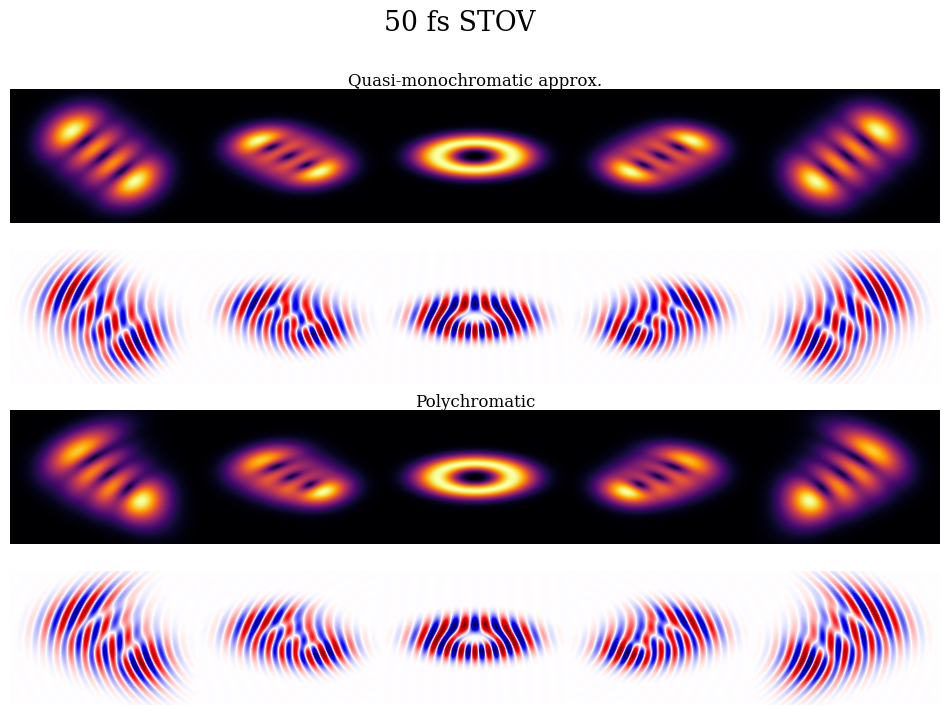

In [51]:
N = len(d_list)
fig, ax = plt.subplots(4, N, figsize=(12, 8))
fig.subplots_adjust(wspace=0, hspace=0.2)
cmap='inferno'

for i, d in enumerate(d_list):
    x, t = monogrid_list[i][0][0], monogrid_list[i][1].T[0] # retrieve axes from meshgrid
    t = t
    x = x/IR.w0
    t = t/1e-15
    extent=[t[0], t[-1], x[0], x[-1]]

    ax[0, i].imshow(np.abs(mono_list[i]).T, cmap=cmap, aspect='auto', extent=extent, interpolation='bilinear')
    ax[1, i].imshow(np.real(mono_list[i]).T/np.max(np.real(mono_list[i])), cmap='seismic', aspect='auto', extent=extent, interpolation='bilinear', vmin=-1, vmax=1)
    ax[2, i].imshow(np.abs(poly_list[i]).T, cmap=cmap, aspect='auto', extent=extent, interpolation='bilinear')
    ax[3, i].imshow(np.real(poly_list[i]).T/np.max(np.real(poly_list[i])), cmap='seismic', aspect='auto', extent=extent, interpolation='bilinear', vmin=-1, vmax=1)

    Xm = 3*wt/1e-15
    Ym = 3*np.max(d_list)/IR.zR 
    for j in range(0, 4):
        ax[j, i].set_xlim(-Xm, Xm)
        ax[j, i].set_ylim(-Ym, Ym)
        ax[j, i].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        ax[j, i].axis('off')

ax[0, 2].set_title('Quasi-monochromatic approx.', fontsize=12, pad=0.1)
ax[2, 2].set_title('Polychromatic', fontsize=12, pad=0.05)
fig.suptitle('50 fs STOV')

plt.show()

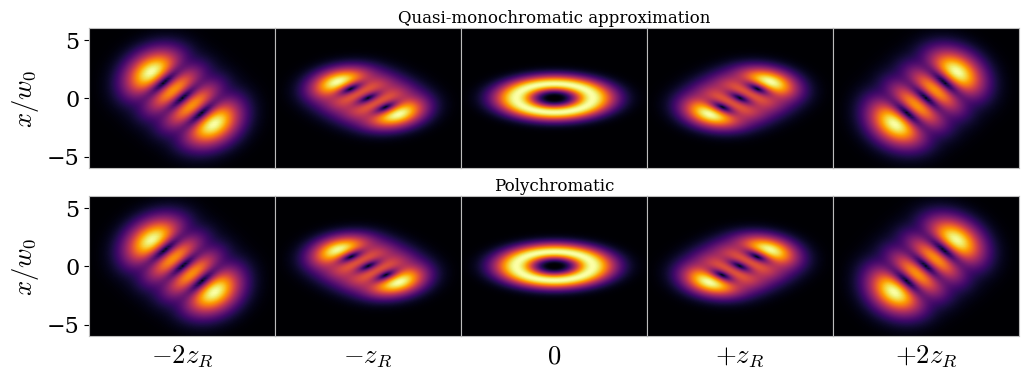

In [55]:
"Plot without the real electric field for long pulses"
N = len(d_list)
fig, ax = plt.subplots(2, N, figsize=(12, 4))
fig.subplots_adjust(wspace=0, hspace=0.2)
cmap='inferno'

for i, d in enumerate(d_list):
    x, t = monogrid_list[i][0][0], monogrid_list[i][1].T[0] # retrieve axes from meshgrid
    t = t
    x = x/IR.w0
    t = t/1e-15
    extent=[t[0], t[-1], x[0], x[-1]]

    ax[0, i].imshow(np.abs(mono_list[i]).T, cmap=cmap, aspect='auto', extent=extent, interpolation='bilinear')
    #ax[1, i].imshow(np.real(mono_list[i]).T/np.max(np.real(mono_list[i])), cmap='seismic', aspect='auto', extent=extent, interpolation='bilinear', vmin=-1, vmax=1)
    ax[1, i].imshow(np.abs(poly_list[i]).T, cmap=cmap, aspect='auto', extent=extent, interpolation='bilinear')
    #ax[3, i].imshow(np.real(poly_list[i]).T/np.max(np.real(poly_list[i])), cmap='seismic', aspect='auto', extent=extent, interpolation='bilinear', vmin=-1, vmax=1)

    Xm = 3*wt/1e-15
    Ym = 3*np.max(d_list)/IR.zR 
    for j in range(0, 2):
        ax[j, i].set_xlim(-Xm, Xm)
        ax[j, i].set_ylim(-Ym, Ym)
        ax[j, i].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        #ax[j, i].axis('off')

labels=['$-2z_R$', '$-z_R$', '$0$', '$+z_R$', '$+2z_R$']
for i in range(N):
    ax[1, i].set_xlabel(labels[i])

ax[0, 0].set_ylabel(r'$x/w_0$')
ax[1, 0].set_ylabel(r'$x/w_0$')
ax[0, 0].tick_params(left=True, labelleft=True)
ax[1, 0].tick_params(left=True, labelleft=True)

ax[0, 2].set_title('Quasi-monochromatic approximation', fontsize=12, pad=4)
ax[1, 2].set_title('Polychromatic', fontsize=12, pad=4)
#fig.suptitle('50 fs STOV')

plt.show()

In [22]:
"FOCUSING STOV"

import importlib
importlib.reload(Optics)

w0 = 1e-3
wt = 5e-15
f = 50e-2
d = f

IR = Optics.Pulse(w0=w0, lam=800e-9, wt=wt)
grid = IR.Grid(Lx=w0*30, Ly=wt*30, Nx=2001, Ny=2001)
x, t = grid[0][0], grid[1].T[0]
STOV = IR.LG_STOV(grid[0], 0, grid[1], l=-3, p=0)

In [23]:
mono_list = []
monogrid_list = []
poly_list = []
polygrid_list = []
d_list = [0, f/2, f, 3*f/2, 2*f, 2*f]

for d in d_list[:-1]:
    if d==0:
        mono_list.append(np.copy(STOV))
        poly_list.append(np.copy(STOV))
        monogrid_list.append(np.copy(grid))
        polygrid_list.append(np.copy(grid))
    else:
        mono, grid_mono = IR.Mono_1D_Fresnel(np.copy(STOV), np.copy(grid), d, lens=True, f=f)
        poly, grid_poly = IR.Poly_1D_Fresnel(np.copy(STOV), np.copy(grid), d, lens=True, f=f)
        mono_list.append(mono)
        poly_list.append(poly)
        monogrid_list.append(grid_mono)
        polygrid_list.append(grid_poly)

# With lens after:
mono, grid_mono = IR.Mono_1D_Fresnel(np.copy(STOV), np.copy(grid), d_list[-1], lens=True, f=f, outlens=True)
poly, grid_poly = IR.Poly_1D_Fresnel(np.copy(STOV), np.copy(grid), d_list[-1], lens=True, f=f, outlens=True)
mono_list.append(mono)
poly_list.append(poly)
monogrid_list.append(grid_mono)
polygrid_list.append(grid_poly)

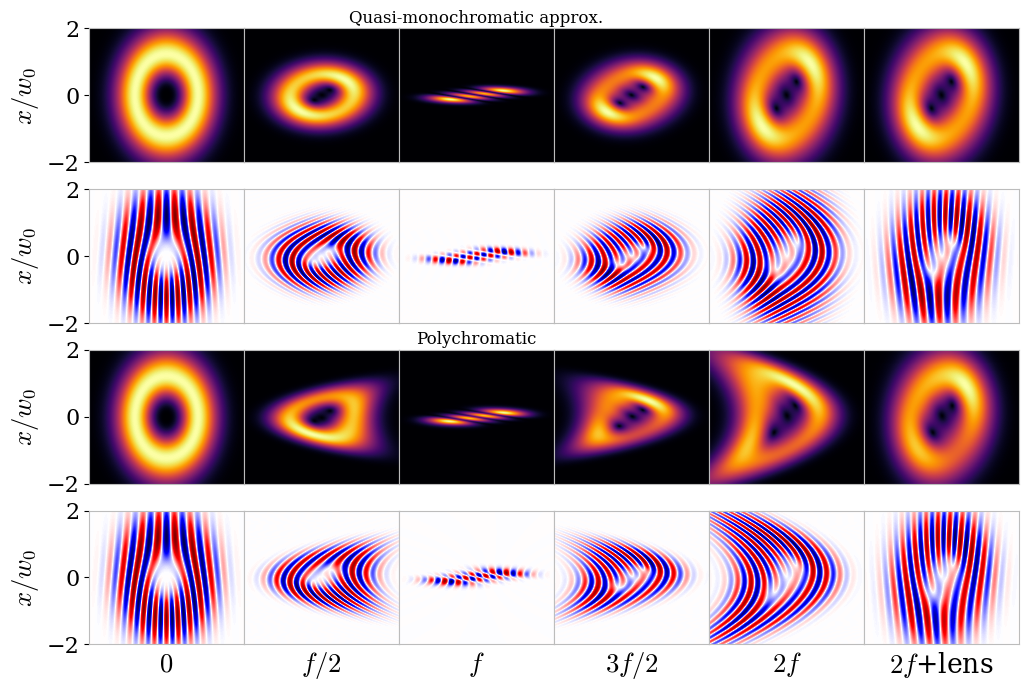

In [24]:
N = len(d_list)
fig, ax = plt.subplots(4, N, figsize=(12, 8))
fig.subplots_adjust(wspace=0, hspace=0.2)
cmap='inferno'

for i, d in enumerate(d_list):
    x, t = monogrid_list[i][0][0], monogrid_list[i][1].T[0] # retrieve axes from meshgrid
    t = t
    x = x/IR.w0
    t = t/1e-15
    extent=[t[0], t[-1], x[0], x[-1]]

    ax[0, i].imshow(np.abs(mono_list[i]).T, cmap=cmap, aspect='auto', extent=extent, interpolation='bilinear')
    ax[1, i].imshow(np.real(mono_list[i]).T/np.max(np.real(mono_list[i])), cmap='seismic', aspect='auto', extent=extent, interpolation='bilinear', vmin=-1, vmax=1)
    ax[2, i].imshow(np.abs(poly_list[i]).T, cmap=cmap, aspect='auto', extent=extent, interpolation='bilinear')
    ax[3, i].imshow(np.real(poly_list[i]).T/np.max(np.real(poly_list[i])), cmap='seismic', aspect='auto', extent=extent, interpolation='bilinear', vmin=-1, vmax=1)

    Xm = 3*wt/1e-15
    Ym = 2 
    for j in range(0, 4):
        ax[j, i].set_xlim(-Xm, Xm)
        ax[j, i].set_ylim(-Ym, Ym)
        ax[j, i].tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)
        #ax[j, i].axis('off')
        #ax[j,-1].set_ylim(-Ym*15, Ym*15)

labels=['$0$', '$f/2$', '$f$', '$3f/2$', '$2f$', '$2f$+lens']
for i in range(N):
    ax[3, i].set_xlabel(labels[i])

ax[0, 0].set_ylabel(r'$x/w_0$')
ax[1, 0].set_ylabel(r'$x/w_0$')
ax[2, 0].set_ylabel(r'$x/w_0$')
ax[3, 0].set_ylabel(r'$x/w_0$')
ax[0, 0].tick_params(left=True, labelleft=True)
ax[1, 0].tick_params(left=True, labelleft=True)
ax[2, 0].tick_params(left=True, labelleft=True)
ax[3, 0].tick_params(left=True, labelleft=True)


ax[0, 2].set_title('Quasi-monochromatic approx.', fontsize=12, pad=4)
ax[2, 2].set_title('Polychromatic', fontsize=12, pad=4)
#fig.suptitle('Focusing a 50 fs STOV')

plt.show()